# Data Analysis and Statistical Significance Testing for Axiom Metrics

This notebook performs data analysis and statistical significance testing on axiom metrics using pandas, matplotlib, and scipy.

In [ ]:
!pip install pandas scipy matplotlib numpy openpyxl

In [4]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


In [149]:
# Function to load data from an Excel file
def load_data(file_name, sheet_names):
    data = {}
    for sheet in sheet_names:
        data[sheet] = pd.read_excel(file_name, sheet_name=sheet)
    return data

# Example usage:
file_name = '../evaluations/runs.xlsx'
sheet_names = ['GPT4', 'Llama3']
data = load_data(file_name, sheet_names)


In [150]:
# Function to calculate Pearson correlation and p-value
def correlation_test(df, axiom, metric):
    # Remove NaN and infinite values
    valid_data = df[[axiom, metric]].replace([np.inf, -np.inf], np.nan).dropna()
    if len(valid_data) < 2:
        return np.nan, np.nan  # Not enough data to calculate correlation
    correlation, p_value = stats.pearsonr(valid_data[axiom], valid_data[metric])
    return correlation, p_value


In [157]:
def scatter_plot_with_trend_lines(ax, x, y_precision, y_recall, y_f1, axiom, sheet_name, significance_threshold=0.05):
    metrics = ['Precision', 'Recall', 'F1']
    colors = {'Precision': '#1F77B4', 'Recall': '#FF7F0E', 'F1': '#2CA02C'}
    
    # Drop rows where any of the relevant columns have NA values
    df_clean = df[[axiom, 'Precision', 'Recall', 'F1']].dropna()
    data = []
    for metric in metrics:
        y_data = df_clean[metric]
        x_data = df_clean[axiom]
        
        correlation, p_value = correlation_test(df_clean, axiom, metric)
        significance = "Significant" if p_value < significance_threshold else "Not Significant"
        label = f'{metric} ({significance})'

        # Scatter plot
        ax.scatter(x_data, y_data, label=label, color=colors[metric], alpha=0.5)

        # Trend line
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        ax.plot(x_data, p(x_data), linestyle='--', color=colors[metric])
        data.append(
            {
                'model': sheet_name,
                'axiom': axiom,
                'metric': metric,
                'correlation': correlation,
                'p-value': p_value,
                'significance': significance
            }
        )

    ax.set_xlabel('Value')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.set_title(f'{axiom} ({sheet_name})')  # Update the title
    ax.legend()
    ax.grid(True)  # Add gridlines
    return data


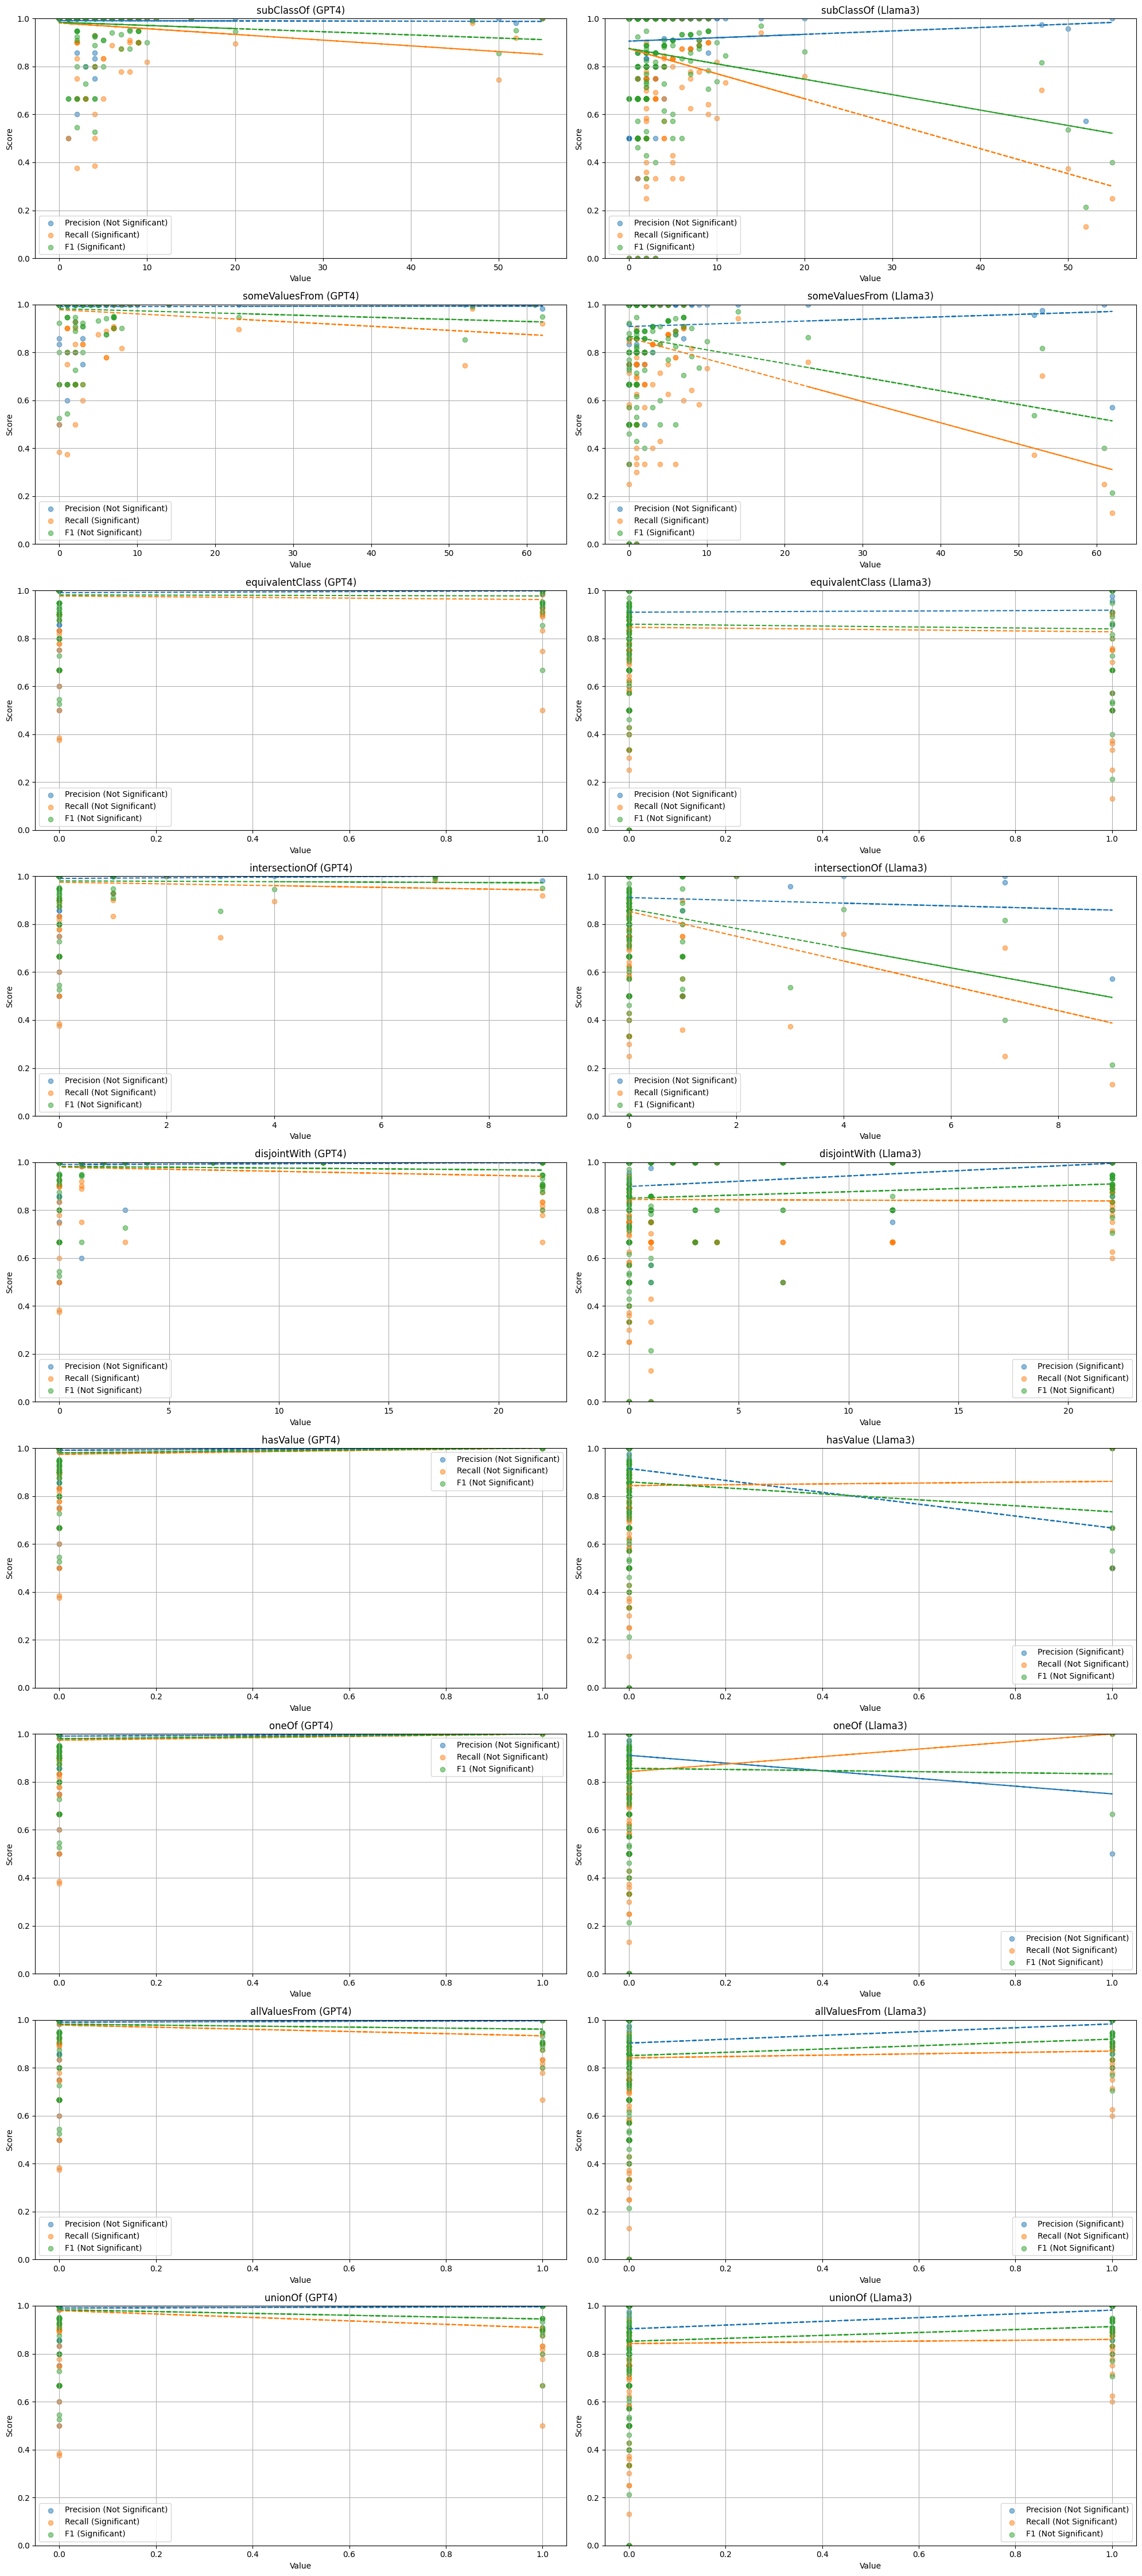

In [158]:
# Define the list of axioms
axioms = ['subClassOf', 'someValuesFrom', 'equivalentClass', 'intersectionOf', 
          'disjointWith', 'hasValue', 'oneOf', 'allValuesFrom', 'unionOf']

# Number of axioms and sheets
num_axioms = len(axioms)
num_sheets = len(data)

# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_axioms, num_sheets, figsize=(num_sheets * 10, num_axioms * 5), squeeze=False)
data_table = []
# Iterate over sheets and axioms to populate each subplot
for sheet_idx, (sheet_name, df) in enumerate(data.items()):
    for row_idx, axiom in enumerate(axioms):
        # Get the current axis
        ax = axs[row_idx, sheet_idx]
        # Plot on the current axis
        result = scatter_plot_with_trend_lines(ax, df[axiom], df['Precision'], df['Recall'], df['F1'], axiom, sheet_name, 0.05)
        data_table.extend(result)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [159]:
pd.DataFrame(data_table)

,model,axiom,metric,correlation,p-value,significance
0,GPT4,subClassOf,Precision,-0.006431,9.084797e-01,Not Significant
1,GPT4,subClassOf,Recall,-0.161055,3.758686e-03,Significant
2,GPT4,subClassOf,F1,-0.114243,4.048539e-02,Significant
3,GPT4,someValuesFrom,Precision,0.004469,9.363314e-01,Not Significant
4,GPT4,someValuesFrom,Recall,-0.129927,1.968608e-02,Significant
5,GPT4,someValuesFrom,F1,-0.086546,1.211716e-01,Not Significant
6,GPT4,equivalentClass,Precision,0.048171,3.889461e-01,Not Significant
7,GPT4,equivalentClass,Recall,-0.055143,3.239285e-01,Not Significant
8,GPT4,equivalentClass,F1,-0.022023,6.938010e-01,Not Significant
9,GPT4,intersectionOf,Precision,0.022964,6.814142e-01,Not Significant
